<img src="https://www.earthsystemcog.org/site_media/logos/gfs4c.png">

## Archive GFS Analysis Grib Files
Some days are missing...

Roughly 10 days behind current date 

* https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs

In [1]:

import pygrib

# Random Library Imports
import os,glob,re,time

# Importing Datetime Libraries
from datetime import datetime, timedelta

# CartoPy Map Plotting Libraires
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


# Numerical and Scientific Libraries
import numpy as np
from scipy.ndimage import gaussian_filter

# MetPy Libraries
from metpy.plots import add_metpy_logo

# Matplotlib Plotting Libraries
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mticker

# Warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.gridspec as gridspec
print("done.")

done.


In [285]:
# MetPy Function
def plot_maxmin_points(ax,lon, lat, data, extrema, nsize, symbol,color='k', outline_color='k',
                       outline_width=2.5, press_spacing=0.66,plotValue=True, transform=None,zorder=None):

    """
    ax argument allows for sending current axis to the HiLo plot 
    
    Path effects on the symbols and pressure readings - outline them in black (default) with linewidth 
    2.5 (default) to make them pop a bit more. The press_spacing (0.66 default) is based off latitude and helps 
    serarate the pressure reading and the symbol with the outline effects making them overlap.
    
    
    This function will find and plot relative maximum and minimum for a 2D grid. The function
    can be used to plot an H for maximum values (e.g., High pressure) and an L for minimum
    values (e.g., low pressue). It is best to used filetered data to obtain  a synoptic scale
    max/min value. The symbol text can be set to a string value and optionally the color of the
    symbol and any plotted value can be set with the parameter color
    lon = plotting longitude values (2D)
    lat = plotting latitude values (2D)
    data = 2D data that you wish to plot the max/min symbol placement
    extrema = Either a value of max for Maximum Values or min for Minimum Values
    nsize = Size of the grid box to filter the max and min values to plot a reasonable number
    symbol = String to be placed at location of max/min value
    color = String matplotlib colorname to plot the symbol (and numerica value, if plotted)
    plot_value = Boolean (True/False) of whether to plot the numeric value of max/min point
    The max/min symbol will be plotted on the current axes within the bounding frame
    (e.g., clip_on=True)
    """
    import numpy as np
    from matplotlib import patheffects
    from scipy.ndimage.filters import maximum_filter, minimum_filter
    outline_effect = [patheffects.withStroke(linewidth=outline_width, foreground=outline_color)]

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
        print("max works\n")
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
        print("min works\n")
    else:
        raise ValueError('Value for hilo must be either max or min')
    
    mxy, mxx = np.where(data_ext == data)
    print("mxy,mxx",mxy,mxx,"\n")
    
    for i in range(len(mxy)):
        print(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]])
        print(data[mxy[i],mxx[i]])
        A = ax.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]], symbol, color=color, size=24,
                    clip_on=True, horizontalalignment='center', verticalalignment='center',
                    transform=transform,zorder=zorder)
        A.set_path_effects(outline_effect)
        B = ax.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]-float(press_spacing),
                    str(np.int(data[mxy[i], mxx[i]])),
                    color=color, size=12, clip_on=True, fontweight='bold',zorder=zorder,
                    horizontalalignment='center', verticalalignment='top', transform=transform)
        B.set_path_effects(outline_effect)

In [2]:
# Set the font 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

In [3]:
def create_colormap(colors, position=None, bit=False, reverse=False, name='custom_colormap'):
    """
    returns a linear custom colormap
    Parameters
    ----------
    colors : array-like
        contain RGB values. The RGB values may either be in 8-bit [0 to 255]
        or arithmetic [0 to 1] (default).
        Arrange your tuples so that the first color is the lowest value for the
        colorbar and the last is the highest.
    position : array like
        contains values from 0 to 1 to dictate the location of each color.
    bit : Boolean
        8-bit [0 to 255] (in which bit must be set to
        True when called) or arithmetic [0 to 1] (default)
    reverse : Boolean
        If you want to flip the scheme
    name : string
        name of the scheme if you plan to save it
    Returns
    -------
    cmap : matplotlib.colors.LinearSegmentedColormap
        cmap with equally spaced colors
    """
    if not isinstance(colors, np.ndarray):
        colors = np.array(colors, dtype='f')
    if reverse:
        colors = colors[::-1]
    if position is not None and not isinstance(position, np.ndarray):
        position = np.array(position)
    elif position is None:
        position = np.linspace(0, 1, colors.shape[0])
    else:
        if position.size != colors.shape[0]:
            raise ValueError("position length must be the same as colors")
        elif not np.isclose(position[0], 0) and not np.isclose(position[-1], 1):
            raise ValueError("position must start with 0 and end with 1")
    if bit:
        colors[:] = [tuple(map(lambda x: x / 255., color)) for color in colors]
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))
    return LinearSegmentedColormap(name, cdict, 256)

In [4]:
cd ~/Downloads/

/Users/chowdahead/Downloads


## Search the current working drive for files that start with gfs

In [5]:
ls gfs*

gfsanl_3_20191115_0000_000.grb2


## Use ```glob``` to grab the names of all the gfs files

In [6]:
grib_list = glob.glob('gfsanl*.grb2')
grib_list = sorted(grib_list, key=lambda x: int(re.sub('\D', '', x)))
print(grib_list)

['gfsanl_3_20191115_0000_000.grb2']


## Grabbing the first grib file from our list will allow us to explore the data
* Each entry of the file is a different variable (specified at different heights for most)
* There are over 500 variables for a GFS grib file!!

In [7]:
#grib = "gfsanl_3_20190129_1200_000.grb2" # Set the file name of your input GRIB file
grbs = pygrib.open(grib_list[0])
grb = grbs.read()

### Since there's so many variables, lets just print out the first 10 to get an idea of what the file looks like

In [8]:
j = 0
for i in grb: 
    if j < 10:
        print(i,"\n")
    j +=1

1:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 201911150000 

2:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 201911150000 

3:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 201911150000 

4:Snow mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 201911150000 

5:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 201911150000 

6:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 0 hrs:from 201911150000 

7:Visibility:m (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201911150000 

8:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 0 hrs:from 201911150000 

9:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 0 hrs:from 201911150000 

10:Ventilation Rate:m**2 s**-1 (instant):regular_ll:unknown:level

In [75]:
grb

[1:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 201911150000,
 2:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 201911150000,
 3:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 201911150000,
 4:Snow mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 201911150000,
 5:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 201911150000,
 6:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 0 hrs:from 201911150000,
 7:Visibility:m (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201911150000,
 8:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 0 hrs:from 201911150000,
 9:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 0 hrs:from 201911150000,
 10:Ventilation Rate:m**2 s**-1 (instant):regular_ll:unknown:leve

### There is a built in search by name function, but the exact name has be specified

In [13]:
grbs.select(name="MSLP")

ValueError: no matches found

In [9]:
grbs.select(name="MSLP (Eta model reduction)")

[400:MSLP (Eta model reduction):Pa (instant):regular_ll:meanSea:level 0:fcst time 0 hrs:from 201911150000]

In [10]:
MSLP = grbs.select(name="MSLP (Eta model reduction)")

### ahhhhhhh

In [16]:
grbs.message(100)

100:Geometric vertical velocity:m s**-1 (instant):regular_ll:isobaricInhPa:level 10000 Pa:fcst time 0 hrs:from 201911150000

## Grab subsets of data based off variable name:

### Geopotential Heights:

In [11]:
#GeoHeight = []
#for i in grbs.select(name="Geopotential Height"):
#    GeoHeight.append(i)

GeoHeight = [i for i in grbs.select(name="Geopotential Height")]
GeoHeight[0]

12:Geopotential Height:gpm (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 201911150000

In [12]:
#Temp = []
#for i in grbs.select(name="Temperature"):
#    Temp.append(i)

Temp = [i for i in grbs.select(name="Temperature")]
Temp[0:5]

[13:Temperature:K (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 201911150000,
 17:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201911150000,
 23:Temperature:K (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 201911150000,
 29:Temperature:K (instant):regular_ll:isobaricInhPa:level 300 Pa:fcst time 0 hrs:from 201911150000,
 35:Temperature:K (instant):regular_ll:isobaricInhPa:level 500 Pa:fcst time 0 hrs:from 201911150000]

In [13]:
#AbVort = []
#for i in grbs.select(name="Absolute vorticity"):AbVort.append(i)

AbVort = [i for i in grbs.select(name="Absolute vorticity")]
print(AbVort[0].values)
AbVort[0:5]


[[ 0.000195  0.000195  0.000195 ...  0.000195  0.000195  0.000195]
 [ 0.000201  0.000201  0.000201 ...  0.000201  0.000201  0.000201]
 [ 0.000209  0.000209  0.000209 ...  0.000209  0.000209  0.000209]
 ...
 [-0.000124 -0.000124 -0.000124 ... -0.000124 -0.000124 -0.000124]
 [-0.000123 -0.000123 -0.000123 ... -0.000123 -0.000123 -0.000123]
 [-0.000123 -0.000123 -0.000123 ... -0.000123 -0.000123 -0.000123]]


[14:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 201911150000,
 51:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201911150000,
 55:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 1500 Pa:fcst time 0 hrs:from 201911150000,
 62:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 2000 Pa:fcst time 0 hrs:from 201911150000,
 69:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 3000 Pa:fcst time 0 hrs:from 201911150000]

## Each entry in our new list is a ```pygrib.gribmessage```

* https://jswhit.github.io/pygrib/docs/pygrib.gribmessage-class.html

In [33]:
type(GeoHeight[0])

pygrib.gribmessage

## Analysis datetime ```analDate```

In [51]:
GeoHeight[0].analDate

datetime.datetime(2019, 11, 15, 0, 0)

### Since it is easier to call the variables from the grib file by the entry index, the ```.messagenumber``` instance varibale will find that for us:

In [81]:
GeoHeight[0].messagenumber,grbs[GeoHeight[0].messagenumber]

(12,
 12:Geopotential Height:gpm (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 201911150000)

## Looking to find which index in the whole ```grib``` file is 500mb Geopotential Heights:
* Note: in the pygrib.gribmessage, the level is indicated with Pa, yet when calling the ```pygrib.gribmessage["level"]``` key, it has to be called with hPa. I have no idea why this is, and would have to dive a bit further into the docs...

Find the level of ```GeoHeight[0]```:

In [121]:
GeoHeight[0]["level"]

40

In [39]:
for i in GeoHeight:
    if i["level"] == 500: # !!Look for the 500 hPa not 50000 Pa!!
        mb500_lev_index = i.messagenumber
        print(i,f"\nGrib variable index: {i.messagenumber}")


214:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 50000 Pa:fcst time 0 hrs:from 201911150000 
Grib variable index: 214


In [39]:
GeoHeight[0].keys()

['globalDomain',
 'GRIBEditionNumber',
 'tablesVersionLatest',
 'grib2divider',
 'is_efas',
 'angleSubdivisions',
 'missingValue',
 'ieeeFloats',
 'isHindcast',
 'section0Length',
 'identifier',
 'discipline',
 'editionNumber',
 'totalLength',
 'sectionNumber',
 'section1Length',
 'numberOfSection',
 'centre',
 'centreDescription',
 'subCentre',
 'tablesVersion',
 'masterDir',
 'localTablesVersion',
 'significanceOfReferenceTime',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dataDate',
 'julianDay',
 'dataTime',
 'productionStatusOfProcessedData',
 'typeOfProcessedData',
 'md5Section1',
 'selectStepTemplateInterval',
 'selectStepTemplateInstant',
 'stepType',
 'is_chemical',
 'is_chemical_distfn',
 'is_aerosol',
 'is_aerosol_optical',
 'setCalendarId',
 'deleteCalendarId',
 'is_uerra',
 'sectionNumber',
 'grib2LocalSectionPresent',
 'deleteLocalDefinition',
 'sectionNumber',
 'gridDescriptionSectionPresent',
 'section3Length',
 'numberOfSection',
 'sourceOfGridDefinition

### The data values, lats, and lons are in different entries of each variable speficied at a height

In [129]:
GeoHeight[0].data() # comes out as arrays

(array([[50009.05 , 50009.05 , 50009.05 , ..., 50009.05 , 50009.05 ,
         50009.05 ],
        [49947.61 , 49948.09 , 49948.41 , ..., 49946.33 , 49946.81 ,
         49947.13 ],
        [49897.367, 49898.008, 49898.81 , ..., 49895.45 , 49895.93 ,
         49896.73 ],
        ...,
        [56323.29 , 56323.29 , 56323.29 , ..., 56323.45 , 56323.29 ,
         56323.29 ],
        [56347.77 , 56347.77 , 56347.61 , ..., 56348.09 , 56348.09 ,
         56347.93 ],
        [56365.848, 56365.848, 56365.848, ..., 56365.848, 56365.848,
         56365.848]], dtype=float32),
 array([[ 90.,  90.,  90., ...,  90.,  90.,  90.],
        [ 89.,  89.,  89., ...,  89.,  89.,  89.],
        [ 88.,  88.,  88., ...,  88.,  88.,  88.],
        ...,
        [-88., -88., -88., ..., -88., -88., -88.],
        [-89., -89., -89., ..., -89., -89., -89.],
        [-90., -90., -90., ..., -90., -90., -90.]]),
 array([[  0.,   1.,   2., ..., 357., 358., 359.],
        [  0.,   1.,   2., ..., 357., 358., 359.],
       

In [131]:
# Height values
print("Height values:",GeoHeight[0].data()[0],"\n")

# Lats
print("Lats:",GeoHeight[0].data()[1],"\n")

# Lons
print("Lons:",GeoHeight[0].data()[2])

Height values: [[50009.05  50009.05  50009.05  ... 50009.05  50009.05  50009.05 ]
 [49947.61  49948.09  49948.41  ... 49946.33  49946.81  49947.13 ]
 [49897.367 49898.008 49898.81  ... 49895.45  49895.93  49896.73 ]
 ...
 [56323.29  56323.29  56323.29  ... 56323.45  56323.29  56323.29 ]
 [56347.77  56347.77  56347.61  ... 56348.09  56348.09  56347.93 ]
 [56365.848 56365.848 56365.848 ... 56365.848 56365.848 56365.848]] 

Lats: [[ 90.  90.  90. ...  90.  90.  90.]
 [ 89.  89.  89. ...  89.  89.  89.]
 [ 88.  88.  88. ...  88.  88.  88.]
 ...
 [-88. -88. -88. ... -88. -88. -88.]
 [-89. -89. -89. ... -89. -89. -89.]
 [-90. -90. -90. ... -90. -90. -90.]] 

Lons: [[  0.   1.   2. ... 357. 358. 359.]
 [  0.   1.   2. ... 357. 358. 359.]
 [  0.   1.   2. ... 357. 358. 359.]
 ...
 [  0.   1.   2. ... 357. 358. 359.]
 [  0.   1.   2. ... 357. 358. 359.]
 [  0.   1.   2. ... 357. 358. 359.]]


# With this data now parsed, we can try plotting

Clean up some of the variables we will plot:

In [101]:
mslp = MSLP[0]
data_mslp = mslp.values/100 # only the mslp values, no lats or lons
data_mslp = gaussian_filter(data_mslp, 3)
#data_mslp[0]
mslp_data, lats, lons = mslp.data(lat1=20,lat2=70,lon1=220,lon2=320)
mslp_data

array([[102216.055, 102207.414, 102186.14 , ...,  98505.336,  98924.86 ,
         99350.94 ],
       [102203.26 , 102205.5  , 102180.86 , ...,  98274.46 ,  98618.62 ,
         98993.336],
       [101905.336, 101847.58 , 101860.375, ...,  97926.78 ,  98200.695,
         98480.22 ],
       ...,
       [101588.375, 101599.1  , 101618.78 , ..., 101818.94 , 101820.54 ,
        101819.414],
       [101531.58 , 101539.1  , 101559.58 , ..., 101753.5  , 101752.695,
        101767.26 ],
       [101471.734, 101482.62 , 101490.14 , ..., 101685.82 , 101692.86 ,
        101725.66 ]], dtype=float32)

In [40]:
grb_500 = grbs.select()[mb500_lev_index-1]
print(grb_500)
data_500mb = grb_500.values


214:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 50000 Pa:fcst time 0 hrs:from 201911150000


In [106]:
for i in AbVort:
    if i["level"] == 500: # !!Look for the 500 hPa not 50000 Pa!!
        vort500_lev_index = i.messagenumber
        print(i,f"\nGrib variable index: {i.messagenumber}")
grb_500_vort = grbs.select()[vort500_lev_index-1]
print(grb_500_vort)
data_500vort = grb_500_vort.values
#data_500vort = gaussian_filter(data_500vort,1)

222:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 50000 Pa:fcst time 0 hrs:from 201911150000 
Grib variable index: 222
222:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 50000 Pa:fcst time 0 hrs:from 201911150000


### The date can be grabbed from the data as well:

In [44]:
print(f"Data Date: {mslp['dataDate']}")
print(f"Hour: {mslp['hour']}")
print(f"Minute: {mslp['minute']}")
print(f"Forecast Time: {mslp['forecastTime']}")
print(f"Data Time: {mslp['dataTime']}")
#file_time = str(mslp['dataDate'])+"_"+str(mslp['hour'])+str(mslp['hour'])
      
Date = mslp['dataDate']
Hour = mslp['hour']
Minute = mslp['minute']
InitHour = mslp['dataTime']
print(type(Minute))    

if Hour < 10:
    Hour = f"0{Hour}"
if Minute < 10:
    Minute = f"0{Minute}"
if InitHour < 10:
    InitHour = f"0{InitHour}"
      
      
file_time = f"{Date}_{InitHour}00Z_F{Hour}"
file_time

Data Date: 20191115
Hour: 0
Minute: 0
Forecast Time: 0
Data Time: 0
<class 'int'>


'20191115_0000Z_F00'

### Grab the lat/lons:

In [46]:
lat,lon = mslp.latlons()
#lon_2d, lat_2d = np.meshgrid(lon, lat)

In [48]:
# Add Map Features
states_provinces = cfeature.NaturalEarthFeature(category='cultural',
    name='admin_1_states_provinces_lakes',scale='50m', facecolor='none')

country_borders = cfeature.NaturalEarthFeature(category='cultural',
    name='admin_0_countries',scale='50m', facecolor='none')

# Colorbar Axis Placement (under figure)
colorbar_axis = [0.218, 0.01, 0.589, 0.03] # [left, bottom, width, height]

# Lat/Lon Extents [lon0,lon1,lat0,lat1]
extent = [-180., -60, 20., 70.]

kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
              'rightside_up': True, 'use_clabeltext': True}

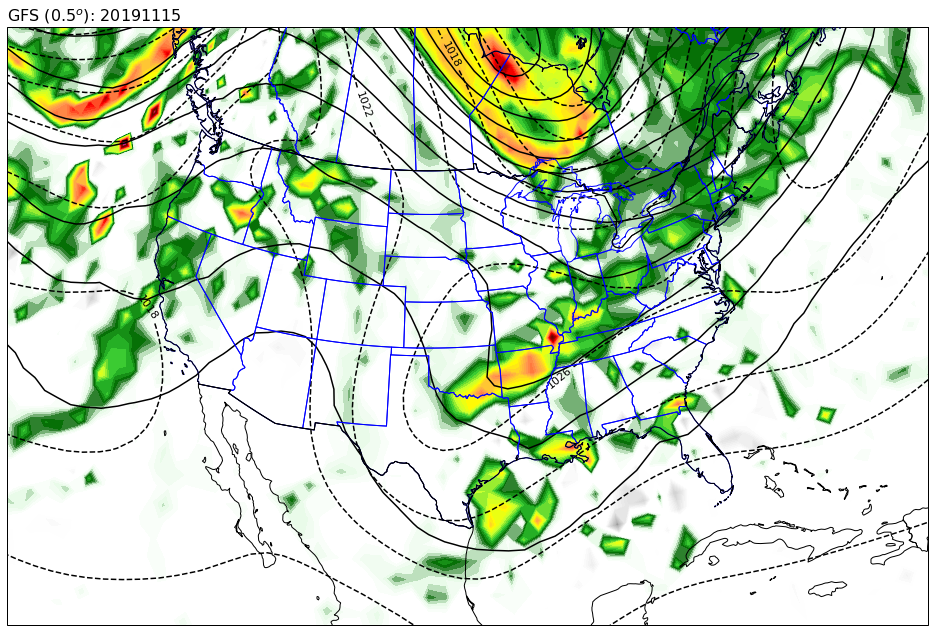

CPU times: user 2min 9s, sys: 695 ms, total: 2min 10s
Wall time: 2min 12s


In [107]:
%%time
# Create new figure
datacrs = ccrs.PlateCarree()
plotcrs = ccrs.NorthPolarStereo(central_longitude=-100.0)

#fig = plt.figure(figsize=(17., 11.))
fig = plt.figure(figsize=(17., 11.))

add_metpy_logo(fig, 30, 1000, size='small')

    # Add the map and set the extent
ax = plt.subplot(111, projection=plotcrs)

#add_metpy_logo(fig, 30, 940, size='small')
#gs = gridspec.GridSpec(2, 1, height_ratios=[1, .02],
#                           bottom=.02, top=.95, hspace=0.01, wspace=0.01)

#ax = plt.subplot(gs[0], projection=plotcrs)
# Add the map and set the extent
#ax = plt.subplot(111, projection=plotcrs)

#Set the lat and lon boundaries
#ax.set_extent(extent, datacrs)
#ax.set_extent([-180, 180, 10, 90], ccrs.PlateCarree())
ax.set_extent([-125, -70, 20, 55], ccrs.PlateCarree())

# Add state boundaries to plot
ax.add_feature(states_provinces, edgecolor='blue', linewidth=1,zorder=10)

# Add country borders to plot
ax.add_feature(country_borders, edgecolor='black', linewidth=1,zorder=10)

# Plot Title
plt.title("GFS ($0.5^o$): "+str(Date), fontsize=16,loc='left')






'''
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.xlines = True
#gl.xlocator = mticker.FixedLocator([-125, -110, -95, -80, -70])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'color': 'red', 'weight': 'bold'}

gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
'''


#vort_levels = np.arange(-.00055,.0007,0.00001)
vort_levels = vort_cmap.vort_levels

cs = ax.contour(lon, lat, data_mslp,np.arange(970,1040,4),colors='k',linestyles='dashed',transform=datacrs)#cmap='nipy_spectral'
plt.clabel(cs, **kw_clabels)
cs2 = ax.contour(lon, lat, data_500mb,np.arange(5000,6000,75),transform=datacrs,colors="k")
plt.clabel(cs, **kw_clabels)
cs3 = ax.contourf(lon, lat, data_500vort,vort_levels,transform=datacrs,cmap=vort_cmapz)

#cbaxes = fig.add_axes(colorbar_axis) # [left, bottom, width, height]

#cbar = plt.colorbar(cs2, orientation='horizontal',cax=cbaxes)
plt.show()


In [97]:
ls *.py

AWIPS_CWA_SPC_TornReports_Py.py
AWIPS_GOES_Py.py
AWS_GOES_ch9_DAILY_from_file.py
Cell_Hide_Toggle.py
Color_Bar.py
GFS_3day_Forecast_HILO_Daily_2019_11_07.py
GFS_3day_Forecast_PV_Upflux_Daily_Py.py
GFS_Forecast_1000_and_500mb_script.py
GFS_Forecast_Thredds_WeatherBlog.py
GOES_AWIPS_function_script.py
GOES_IR_ColorMap.py
GOES_Images_WV.py
GOES_nc_file_LatLon_Readout.py
HILO_Symbol_Plot.py
HiLo.py
MetPy_AWS_Radar_Py.py
MetPy_Basic_Sounding.py
Radar_Current_Quick.py
Thredds_CONUS_Composite_Radar_Final.py
Vorticity_Color_Bar.py
cross_section_GFS_thredds_archvied_file_Py.py
cross_section_archvied_GFS_file_PV.py
ogr2ogr.py


In [108]:
import Vorticity_Color_Bar as vort_cmap

In [99]:
vort_cmapz = vort_cmap.my_cmap

In [110]:
vort_levels = vort_cmap.vort_levels

In [115]:
grbs.select(name="Geopotential Height",level=500)

[214:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 50000 Pa:fcst time 0 hrs:from 201911150000]

In [ ]:
grb_500 = grbs.select()[141]
print(grb_500)
data_500mb = grb_500.values


grb_temp = grbs.select()[260]
print(grb_temp)
data_temp = grb_temp.values


grb_or = grbs.select()[248]
print(grb_or)
data_or = grb_or.values
data_or = np.ma.masked_where(data_or > 4200.,data_or)

grb_gph = grbs.select()[342]
print(grb_gph)
data_gph = grb_gph.values
#print(data)


grb_mslp = grbs.select()[245]
print(grb_mslp)
data_mslp = grb_mslp.values/100

grb_u = grbs.select()[101]
print(grb_u)
data_u = grb_u.values
#print(data_u.max(),data_u.min())
#print(data)

grb_v = grbs.select()[102]
print(grb_v)
data_v = grb_v.values
#print(data_v.max(),data_v.min())
#print(data)


grb_Vort = grbs.select()[147]
print(grb_Vort)
data_Vort = grb_Vort.values


grb_u['units'],grb_v['units']

In [ ]:
list(grb_temp.keys())

In [ ]:
print(grb_temp['dataDate'])
Date = grb_temp['dataDate']
print(grb_temp['hour'])
print(grb_temp['minute'])
print(grb_temp['forecastTime'])
print(grb_temp['dataTime'])
file_time = str(grb_temp['dataDate'])+"_"+str(grb_temp['hour'])+str(grb_temp['hour'])
#file_time = f"{}{}"

In [ ]:
lat,lon = grb_temp.latlons()


In [ ]:

# Add Map Features
states_provinces = cfeature.NaturalEarthFeature(category='cultural',
    name='admin_1_states_provinces_lakes',scale='50m', facecolor='none')

country_borders = cfeature.NaturalEarthFeature(category='cultural',
    name='admin_0_countries',scale='50m', facecolor='none')

# Colorbar Axis Placement (under figure)
colorbar_axis = [0.218, 0.01, 0.589, 0.03] # [left, bottom, width, height]

# Lat/Lon Extents [lon0,lon1,lat0,lat1]
extent = [-180., -60, 20., 70.]

<h2>----------------------------------------------//---------------------------------------------------------</h2>

In [ ]:


# Create new figure
datacrs = ccrs.PlateCarree()
plotcrs = ccrs.NorthPolarStereo(central_longitude=-100.0)

fig = plt.figure(figsize=(17., 11.))

add_metpy_logo(fig, 30, 940, size='small')
gs = gridspec.GridSpec(2, 1, height_ratios=[1, .02],
                           bottom=.02, top=.95, hspace=0.01, wspace=0.01)

ax = plt.subplot(gs[0], projection=plotcrs)
# Add the map and set the extent
#ax = plt.subplot(111, projection=plotcrs)

#Set the lat and lon boundaries
#ax.set_extent(extent, datacrs)
#ax.set_extent([-180, 180, 10, 90], ccrs.PlateCarree()) Northenr Hemisphere
ax.set_extent([-125, -70, 20, 55], ccrs.PlateCarree())

# Add state boundaries to plot
ax.add_feature(states_provinces, edgecolor='blue', linewidth=1,zorder=10)

# Add country borders to plot
ax.add_feature(country_borders, edgecolor='black', linewidth=1,zorder=10)

# Plot Title
plt.title("GFS ($0.5^o$): "+str(Date), fontsize=16,loc='left')


cs = ax.contour(lon, lat, data_mslp,np.arange(980,1025,1),transform=datacrs,cmap='nipy_spectral')
#cs2 = ax.contourf(lon, lat, data,100,transform=datacrs,cmap='gist_earth_r')
#cs3 = ax.contour(lon, lat, data_mslp/100.,clev_mslp,transform=datacrs,colors="k",zorder=5)
#for c in cs2.collections:
#    c.set_edgecolor("face")
#    c.set_linewidth(0.000000000001)
#cs1 = ax.contour(lon, lat, data,20,transform=datacrs,colors='k')
plot_maxmin_points(ax,lon, lat, data_mslp, 'max', 50, symbol='H', color='k',  transform=datacrs,zorder=10)
plot_maxmin_points(ax,lon, lat, data_mslp, 'min', 25, symbol='L', color='k', transform=datacrs,zorder=10)
cbaxes = fig.add_axes(colorbar_axis) # [left, bottom, width, height]

cbar = plt.colorbar(cs, orientation='horizontal',cax=cbaxes)
plt.show()

plt.show()
outfile="/Users/ChowdaHead/Desktop/_"+file_time+".png"
#fig.savefig(outfile,bbox_inches='tight',dpi=120)

<h2>----------------------------------------------//---------------------------------------------------------</h2>

<h2>----------------------------------------------//---------------------------------------------------------</h2>